# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 2 </center>

## <center>Grupo 21</center>

#### Integrantes: Francisco Juárez, Lucas Aldazabal, Valentin Schneider, Gonzalo Rizzo Ehrenbock

# <center> Procesamiento del Lenguaje Natural <center/> 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")

In [77]:
#Import dataframe
ds_propiedades = pd.read_csv('./ds_propiedades_total_clasificado.csv')
ds_descripciones = pd.read_csv('./properati_argentina_2021_decrip.csv')
ds_propiedades.head()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo


In [78]:
#filter ds_descripciones by id in ds_propiedades
ds_descripciones = ds_descripciones[ds_descripciones['id'].isin(ds_propiedades['id'])]
ds_descripciones.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
10,+9uGr8tPEUkKnpjOef+gUw==,SE VENDE EXCELENTE PH de 2 CÓMODOS AMBIENTES M...
11,uH5H+RfQM87Qtrb13+T4hA==,"Venta PH 4 ambientes Paternal<br><br>Cálido, ..."


## Exportamos el dataframe a un archivo de texto para poder pasarlo por ECmes

In [79]:
ds_descripciones_sin_id = ds_descripciones.drop(['id'], axis=1)

ds_descripciones_sin_id.to_csv('ds_descripciones.txt', index=False)

## Limpiamos el archivo de descripciones para que lo pueda leer Ecmes correctamente.

In [80]:
dic_replace = {
    '(': ',',
    ')': ',',
    '<br>': ' ',
    '<br/>': ' ',
    '/': ' ',
    '°': ' ',
    'º': ' ',
    ';': ' ',
    '•': ' ',
    ':': ' ',
    '#': ' ',
    '•': ' ',
    '-': ' ',
    '_': ' ',
    '"': ' ',
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U',
    'ñ': 'ni',
    'Ñ': 'NI',
    '!': ' ',
    'm²': 'm2',
    'M²': 'M2',
    '&': 'y',
}

In [81]:
#for every line in ds_descripciones.txt replace the '(' and ')' with ',' and save it in ds_descripciones.txt line by line 
with open('ds_descripciones.txt', 'r', encoding = 'utf8') as f_in, open('ds_descripciones_out.txt', 'w', encoding = 'utf8') as f_out:
    for line in f_in:
        for src, target in dic_replace.items():
            line = line.replace(src, target)
        f_out.writelines(line)


    



##### por ahora no usamos esto, pero capaz lo necesitamos en algun momento

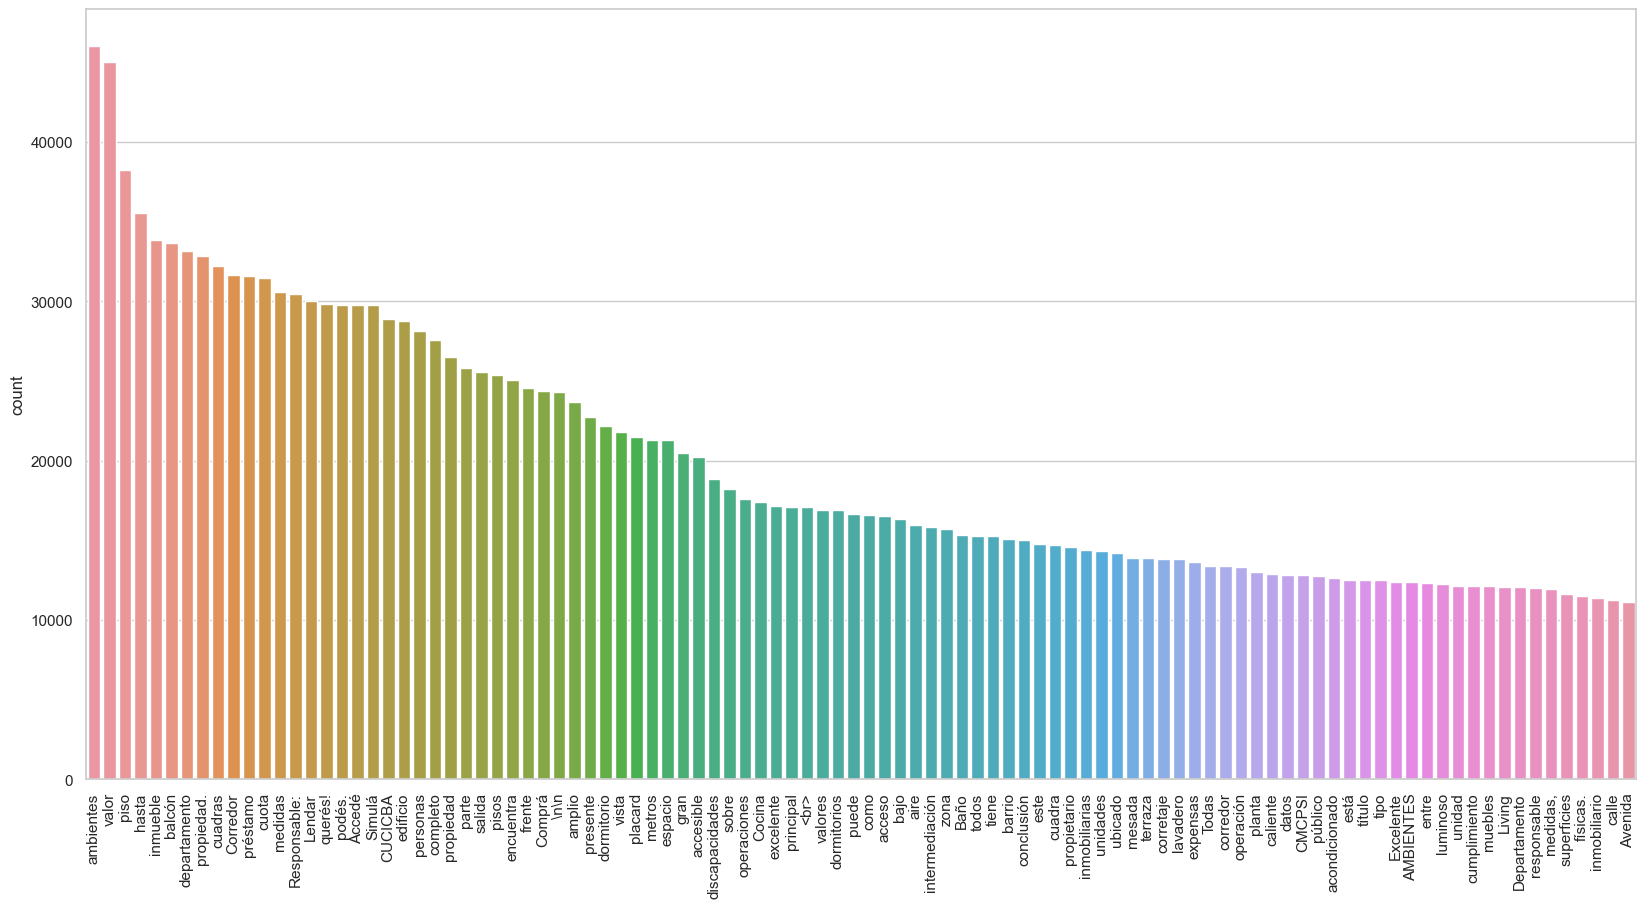

In [82]:
# count how many times every word appears in ds_descripciones['property_description']
# and save it in a dictionary


word_count = {}
palabras_ignoradas = ['para', 'baño', 'cocina', 'comedor','casa','cuenta','esta','living']
ds_descripciones.reset_index(drop=True, inplace=True)

for i in range(len(ds_descripciones['property_description'])):
    if type(ds_descripciones['property_description'][i]) == str:
        for word in ds_descripciones['property_description'][i].split():
            if len(word) < 4 or word in palabras_ignoradas:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# save dictionary in a dataframe

word_count_aux = word_count.copy()

for key, value in word_count_aux.items():
    if value <= 300:
        del word_count[key]

df_word_count = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])
df_word_count.sort_values(by=['count'], ascending=False, inplace=True)
df_word_count



# barplot of the 20 most common words
plt.figure(figsize=(20,10))
sns.barplot(x=df_word_count.index[:100], y=df_word_count['count'][:100])
plt.xticks(rotation=90)
plt.show()


In [83]:
##split train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds_descripciones_sin_id, ds_propiedades['tipo_precio'], test_size=0.20, random_state=1)

## 1b) Entranamiento XGBoost
### Hiperparametros TP1

In [84]:
import xgboost as xgb

#Creo un modelo de XGBoost para reductir el error cuadraditico medio
xgb.XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [85]:
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror',
 base_score= None,
 booster= None,
 callbacks= None,
 colsample_bylevel= None,
 colsample_bynode= None,
 colsample_bytree= None,
 early_stopping_rounds= None,
 enable_categorical= False,
 eval_metric= None,
 feature_types= None,
 gamma= None,
 gpu_id= None,
 grow_policy= None,
 importance_type= None,
 interaction_constraints= None,
 learning_rate= None,
 max_bin= None,
 max_cat_threshold= None,
 max_cat_to_onehot= None,
 max_delta_step= None,
 max_depth= None,
 max_leaves= None,
 min_child_weight= None,
 missing= "nan",
 monotone_constraints= None,
 n_estimators= 100,
 n_jobs= None,
 num_parallel_tree= None,
 predictor= None,
 random_state= None,
 reg_alpha= None,
 reg_lambda= None,
 sampling_method= None,
 scale_pos_weight= None,
 subsample= None,
 tree_method= None,
 validate_parameters= None,
 verbosity= None)

In [86]:
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:property_description: object

In [ ]:
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
         )

print(f"El error (mse) de test es: {mse}")



rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
         )

print(f"El error (rmse) de test es: {rmse}")  

In [ ]:
#Coef. de Determinación R2
score_xgb_train = xgb_model.score(x_train, y_train)
score_xgb_test = xgb_model.score(x_test, y_test)
print(f"El coeficiente de Determinación R2 en train es: {score_xgb_train}")
print(f"El coeficiente de Determinación R2 en test es: {score_xgb_test}")

In [ ]:
# n=10

# #xgb param grid
# xgb_param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.1, 0.3],
#     'max_depth': [3, 7],
#     'gamma': [0.3, 0.4],
# }

# folds=5
# kfoldcv = StratifiedKFold(n_splits=folds, random_state=10,shuffle=True)

# scorer_fn = make_scorer(f1_score, average='micro')

# random_search_cv = RandomizedSearchCV(estimator=xgb_cv,
#                               param_distributions = xgb_param_grid,
#                               scoring=scorer_fn,
#                               cv=kfoldcv,
#                               n_iter=n,
#                               random_state=10) 

# random_fit = random_search_cv.fit(ds_propiedades_train_x, ds_propiedades_train_y)

In [ ]:
# print(random_fit.best_params_)

# <center> Redes Neuronales <center/> 

## Clasificacion

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model

In [88]:
ds_propiedades_para_clasificacion = ds_propiedades.copy()

ds_propiedades_para_clasificacion

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,F5IvmD1uzzdIR7b96ozt4g==,-34.558855,-58.452458,Nuñez,Departamento,4.0,3.0,160.0,146.0,460000.0,Venta: Hermoso piso de categoría en excelente ...,2875.000000,alto
1,IiT/P7WfYDcqbhu7tf5V4Q==,-34.582403,-58.443841,Colegiales,Departamento,2.0,1.0,50.0,46.0,148000.0,Departamento - Colegiales,2960.000000,alto
2,6XXcElx/4OwCcH4NI06Oiw==,-34.605825,-58.422214,Almagro,Departamento,3.0,2.0,47.0,47.0,89000.0,Departamento en venta tres ambientes- Almagro,1893.617021,medio
3,8R7hSzqWFk9rX4wBXxfORA==,-34.561971,-58.455670,Belgrano,Departamento,2.0,1.0,52.0,48.0,127000.0,Departamento - Belgrano,2442.307692,medio
4,UAKYqQx9s0MfIdLzrJv8Ig==,-34.606738,-58.389426,Tribunales,Departamento,3.0,2.0,76.0,75.0,129900.0,Lindísimo departamento antiguo en excelente es...,1709.210526,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85688,H2dCXSgBabToFx4QF7aWbA==,-34.580233,-58.433254,Palermo,PH,3.0,2.0,58.0,58.0,175000.0,PH - Palermo Hollywood,3017.241379,alto
85689,0KMmY+Oe8nuCNPl7hCgnEg==,-34.623065,-58.437939,Caballito,PH,6.0,4.0,184.0,184.0,420000.0,Ph venta,2282.608696,medio
85690,SRSM1f9pRG9qRbIbHl9zfA==,-34.632562,-58.409529,Parque Patricios,PH,2.0,1.0,45.0,41.0,84000.0,PH - Parque Patricios,1866.666667,medio
85691,1vmAb2DQ0xwbIPXTMRPemA==,-34.586987,-58.512022,Villa Devoto,PH,2.0,1.0,86.0,45.0,120000.0,Venta de PH 2 Ambientes con terraza propia y o...,1395.348837,bajo


Modificamos el dataframe para poder usarlo en la red neuronal. Nos quedamos con las columnas necesarias, normalizamos y modificamos los tipos de datos 

In [89]:
# Eliminamos estas columnas porque no las necesitamos para el modelo
ds_propiedades_para_clasificacion.drop(['property_title', 'id'], axis=1, inplace=True)


# One hot encoding de las columnas categóricas
ds_propiedades_para_clasificacion = pd.get_dummies(ds_propiedades_para_clasificacion, columns=["place_l3", "property_type"], dtype=np.int8)


#Eliminamos las columnas que tienen info del precio
ds_propiedades_para_clasificacion.drop(['property_price', 'pxm2'], axis=1, inplace=True)

# Normalizamos las variables de entrada
columnas_predictoras=ds_propiedades_para_clasificacion.columns.to_list()
columnas_predictoras.remove('tipo_precio')

d_in=len(columnas_predictoras)

scaler = MinMaxScaler()
ds_propiedades_para_clasificacion[columnas_predictoras] = scaler.fit_transform(ds_propiedades_para_clasificacion[columnas_predictoras])
ds_propiedades_para_clasificacion

# Convertimos tipo_precio a una columna numerica
ds_propiedades_para_clasificacion.tipo_precio = pd.Categorical(ds_propiedades_para_clasificacion.tipo_precio)
ds_propiedades_para_clasificacion['tipo_precio'] = ds_propiedades_para_clasificacion.tipo_precio.cat.codes

ds_propiedades_para_clasificacion.astype('float32', copy=False)

ds_propiedades_para_clasificacion

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,tipo_precio,place_l3_Abasto,place_l3_Agronomía,place_l3_Almagro,...,place_l3_Villa Pueyrredón,place_l3_Villa Real,place_l3_Villa Riachuelo,place_l3_Villa Santa Rita,place_l3_Villa Soldati,place_l3_Villa Urquiza,place_l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,0.859587,0.416415,0.500000,0.6,0.477477,0.472313,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.715143,0.462460,0.166667,0.2,0.147147,0.146580,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.571472,0.578015,0.333333,0.4,0.138138,0.149837,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.840478,0.399254,0.166667,0.2,0.153153,0.153094,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.565870,0.753212,0.333333,0.4,0.225225,0.241042,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85688,0.728453,0.519028,0.333333,0.4,0.171171,0.185668,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85689,0.465723,0.493996,0.833333,0.8,0.549550,0.596091,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85690,0.407469,0.645797,0.166667,0.2,0.132132,0.130293,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85691,0.687028,0.098150,0.166667,0.2,0.255255,0.143322,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
# Separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(ds_propiedades_para_clasificacion.loc[:,columnas_predictoras],ds_propiedades_para_clasificacion.loc[:,'tipo_precio'], test_size=0.20, random_state=1)

Creamos la red neuronal

In [91]:
# calcula la cantidad de clases
classes=int(ds_propiedades_para_clasificacion.shape[1]+1)


modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),

    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid'),

    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

modelo.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 3)                 201       
                                                                 
 dense_62 (Dense)            (None, 3)                 12        
                                                                 
 dense_63 (Dense)            (None, 3)                 12        
                                                                 
 dense_64 (Dense)            (None, 3)                 12        
                                                                 
 dense_65 (Dense)            (None, 68)                272       
                                                                 
Total params: 509
Trainable params: 509
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Compilamos el modelo
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
)
 
# Entrenamiento del modelo
history = modelo.fit(x_train,y_train,epochs=150,batch_size=200,verbose=True)

Epoch 1/150
343/343 [==============================] - 1s 936us/step - loss: 1.4282 - accuracy: 0.4948
Epoch 2/150
343/343 [==============================] - 0s 918us/step - loss: 1.0547 - accuracy: 0.5011
Epoch 3/150
343/343 [==============================] - 0s 1ms/step - loss: 1.0477 - accuracy: 0.5011
Epoch 4/150
343/343 [==============================] - 0s 936us/step - loss: 1.0452 - accuracy: 0.5011
Epoch 5/150
343/343 [==============================] - 0s 898us/step - loss: 1.0439 - accuracy: 0.5011
Epoch 6/150
343/343 [==============================] - 0s 915us/step - loss: 1.0430 - accuracy: 0.5011
Epoch 7/150
343/343 [==============================] - 0s 907us/step - loss: 1.0424 - accuracy: 0.5011
Epoch 8/150
343/343 [==============================] - 0s 898us/step - loss: 1.0420 - accuracy: 0.5011
Epoch 9/150
343/343 [==============================] - 0s 904us/step - loss: 1.0417 - accuracy: 0.5011
Epoch 10/150
343/343 [==============================] - 0s 889us/step - los

Vemos las metricas obtenidas

In [93]:
y_pred = modelo.predict(x_test)

y_pred = np.argmax(y_pred,axis = 1) 

print("  Accuracy : %.25f" % accuracy_score(y_test, y_pred) )
print("  Precision: %.25f" % precision_score(y_test, y_pred, average='macro'))
print("     Recall: %.25f" % recall_score(y_test, y_pred, average='macro'))
print("  f-measure: %.25f" % f1_score(y_test, y_pred, average='macro'))

536/536 [==============================] - 0s 544us/step
  Accuracy : 0.6296750102106307700466914
  Precision: 0.6449120924996171178023019
     Recall: 0.5890032795267727827592807
  f-measure: 0.6074747213427570402544120


Las metricas no son malas, pero vamos a ver si podemos optimizar aun mas.
Para buscar otras metricas, vamos a hacerlo iterando por distintas posibilades para los hiperparametros y quedarnos con la que nos de las mejores.

In [98]:
import random

random.seed(1)

activations = ['relu', 'tanh', 'sigmoid', 'softmax']


mejores_hyperparametros = {
    'cant_capas': 0,
    'func_activacion_1': '',
    'func_activacion_2': '',
    'func_activacion_3': '',
    'epochs': 0,
    'batch_size': 0,
}

mejores_metricas = {
  'prom' : 0,
  'accuracy' : 0,
  'precision' : 0,
  'recall' : 0,
  'f-measure' : 0
}

for i in range(0,5):

  cant_salidas = random.randint(0,4)
  func_activacion_1 = activations[random.randint(0,3)]
  func_activacion_2 = activations[random.randint(0,3)]
  func_activacion_3 = activations[random.randint(0,3)]
  modelo = keras.Sequential([
      # input_shape solo en la primer capa
      # Capa con 3 salidas, activación relu
      keras.layers.Dense(3,input_shape=(d_in,), activation=activations[random.randint(0,3)]),

      keras.layers.Dense(cant_salidas, activation=func_activacion_1),
      keras.layers.Dense(cant_salidas, activation=func_activacion_2),
      keras.layers.Dense(cant_salidas, activation=func_activacion_3),

      #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
      keras.layers.Dense(classes, activation='softmax')])

  # Compilamos el modelo
  modelo.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
  )
  
  # Entrenamiento del modelo
  epochs = random.randint(50,150)
  batch_size = random.randint(50,200)



  print(f"Probando con: {cant_salidas} salidas, {func_activacion_1}, {func_activacion_2}, {func_activacion_3}, {epochs} epochs, {batch_size} batch_size")
  history = modelo.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=False)

  y_pred = modelo.predict(x_test)
  y_pred = np.argmax(y_pred,axis = 1) 

  # Utilizamos las metricas que pide la consigna
  pres = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  # Calculamos la media de las metricas
  metricas = (pres + recall + f1) / 3
  
  print("Metricas obtenidas:")
  print(f"precision:{pres}")
  print(f"recall:{recall}")
  print(f"f1:{f1}")
  print()

  if metricas > mejores_metricas['prom']:
    mejores_metricas['prom'] = metricas
    
    mejores_metricas['precision'] = pres
    mejores_metricas['recall'] = recall
    mejores_metricas['f-measure'] = f1

    mejores_hyperparametros['cant_salidas'] = cant_salidas
    mejores_hyperparametros['func_activacion_1'] = func_activacion_1
    mejores_hyperparametros['func_activacion_2'] = func_activacion_2
    mejores_hyperparametros['func_activacion_3'] = func_activacion_3
    mejores_hyperparametros['epochs'] = epochs
    mejores_hyperparametros['batch_size'] = batch_size
  

print(mejores_metricas)
print(mejores_hyperparametros)

Probando con: 1 salidas, relu, sigmoid, relu, 150 epochs, 103 batch_size
536/536 [==============================] - 0s 512us/step
Metricas obtenidas:
precision:0.16603458000272284
recall:0.3333333333333333
f1:0.2216596562289038
Probando con: 0 salidas, softmax, relu, softmax, 107 epochs, 118 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 497us/step
Metricas obtenidas:
precision:0.08294921912985977
recall:0.3333333333333333
f1:0.13284121348034636
Probando con: 1 salidas, relu, sigmoid, relu, 98 epochs, 105 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 495us/step
Metricas obtenidas:
precision:0.16603458000272284
recall:0.3333333333333333
f1:0.2216596562289038
Probando con: 3 salidas, relu, tanh, softmax, 78 epochs, 167 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 480us/step
Metricas obtenidas:
precision:0.16603458000272284
recall:0.3333333333333333
f1:0.2216596562289038
Probando con: 2 salidas, relu, softmax, relu, 145 epochs, 135 batch_size


d:\Programas\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


536/536 [==============================] - 0s 509us/step
Metricas obtenidas:
precision:0.6449780582241308
recall:0.5811026736557446
f1:0.6009548832627734
{'prom': 0.6090118717142162, 'accuracy': 0, 'precision': 0.6449780582241308, 'recall': 0.5811026736557446, 'f-measure': 0.6009548832627734}
{'cant_capas': 0, 'func_activacion_1': 'relu', 'func_activacion_2': 'softmax', 'func_activacion_3': 'relu', 'epochs': 145, 'batch_size': 135, 'cant_salidas': 2}


Buscando de esta forma, las mejores metricas obtenidas son iguales que las obtenidas en el punto anterior, pero con y menos salidas por capa.


In [100]:
print("Mejores Metricas obtenidas:")
print(f"precision:{mejores_metricas['precision']}")
print(f"recall:{mejores_metricas['recall']}")
print(f"f1:{mejores_metricas['f-measure']}")

Mejores Metricas obtenidas:
precision:0.6449780582241308
recall:0.5811026736557446
f1:0.6009548832627734


## Regresion

TO DO: reaprovechar ds_propiedades_para_clasificacion que ya esta todo ordenadito para darselo a la red neuronal

Usamos esta funcion para graficar mas comodo

In [95]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

ValueError: in user code:

    File "d:\Programas\Python\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "d:\Programas\Python\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Programas\Python\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "d:\Programas\Python\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "d:\Programas\Python\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Programas\Python\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_20' (type Sequential).
    
    Input 0 of layer "dense_86" is incompatible with the layer: expected axis -1 of input shape to have value 66, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_20' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None


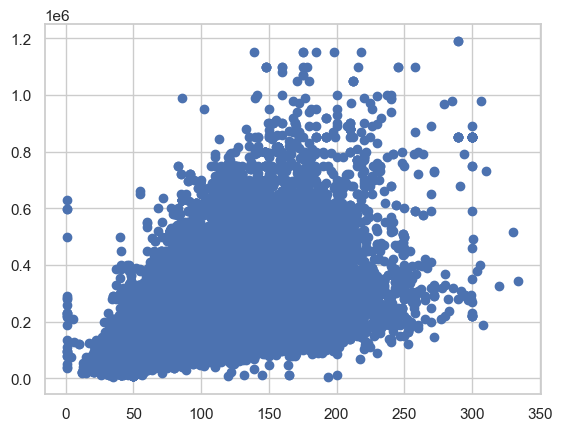

In [96]:
# plot property_surface_total vs property_price
plot_regression(modelo,ds_propiedades['property_surface_total'],ds_propiedades['property_price'],title="property_surface_total vs property_price",xlabel="property_surface_total",ylabel="property_price")

# plot property_surface_covered vs property_price

Transformamos los datos del dataframe

In [ ]:
columnas_predictoras
variable_predictora="latitud"

scaler = MinMaxScaler()
ds_propiedades[variable_predictora] = scaler.fit_transform(ds_propiedades[variable_predictora].to_numpy().reshape(-1, 1))
ds_propiedades['property_price'] = scaler.fit_transform(ds_propiedades['property_price'].to_numpy().reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(ds_propiedades.loc[:,variable_predictora],ds_propiedades.loc[:,'property_price'],test_size=0.2)

sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

x_train_transform=sscaler.transform(pd.DataFrame(x_train))
x_test_transform=sscaler.transform(pd.DataFrame(x_test))

In [ ]:
# Creo un modelo Red Neuronal
d_in=1
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,)), #, activation="relu"

    keras.layers.Dense(3, activation='tanh'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
    ])
modelo1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1)                 2         
                                                                 
 dense_28 (Dense)            (None, 3)                 6         
                                                                 
 dense_29 (Dense)            (None, 3)                 12        
                                                                 
 dense_30 (Dense)            (None, 3)                 12        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


2143/2143 [==============================] - 1s 473us/step


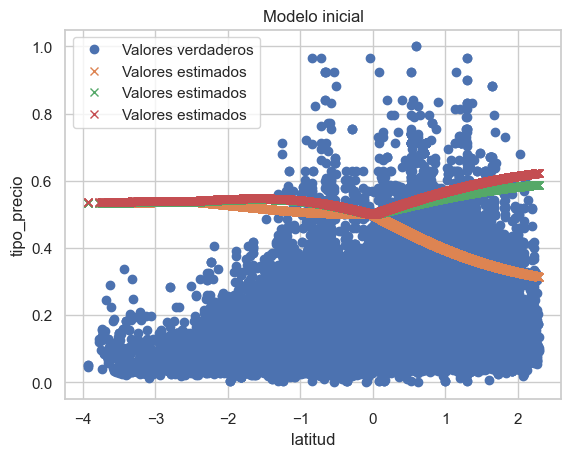

In [ ]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo inicial",xlabel=variable_predictora,ylabel="tipo_precio")

In [ ]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [ ]:
modelo1.fit(x_train_transform,y_train,epochs=50,batch_size=85,verbose=True)

Epoch 1/50
807/807 [==============================] - 1s 719us/step - loss: 0.1432 - mae: 0.3660
Epoch 2/50
807/807 [==============================] - 1s 664us/step - loss: 0.1325 - mae: 0.3519
Epoch 3/50
807/807 [==============================] - 1s 689us/step - loss: 0.1231 - mae: 0.3390
Epoch 4/50
807/807 [==============================] - 1s 633us/step - loss: 0.1149 - mae: 0.3271
Epoch 5/50
807/807 [==============================] - 1s 638us/step - loss: 0.1075 - mae: 0.3162
Epoch 6/50
807/807 [==============================] - 1s 669us/step - loss: 0.1010 - mae: 0.3060
Epoch 7/50
807/807 [==============================] - 1s 644us/step - loss: 0.0950 - mae: 0.2965
Epoch 8/50
807/807 [==============================] - 1s 647us/step - loss: 0.0895 - mae: 0.2875
Epoch 9/50
807/807 [==============================] - 1s 656us/step - loss: 0.0845 - mae: 0.2790
Epoch 10/50
807/807 [==============================] - 1s 664us/step - loss: 0.0799 - mae: 0.2709
Epoch 11/50
807/807 [========

2143/2143 [==============================] - 1s 473us/step


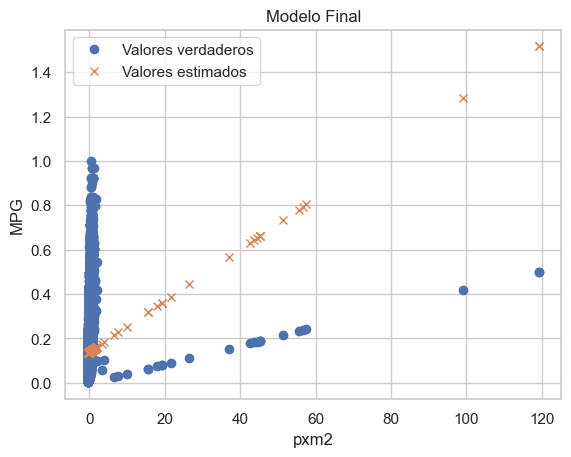

In [ ]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo Final",xlabel=variable_predictora,ylabel="MPG")

536/536 [==============================] - 0s 469us/step


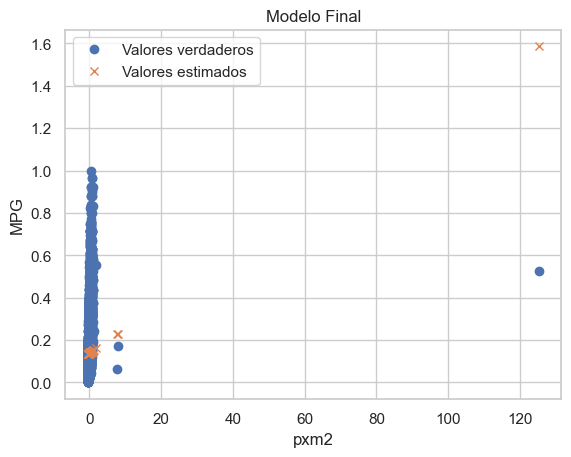

In [ ]:
plot_regression(modelo1,x_test_transform,y_test,title=f"Modelo Final",xlabel=variable_predictora,ylabel="MPG")